# Association Rules Learning

## 1. Visualizing Association Rules

 - [arulesViz: Visualizing Association Rules and Frequent Itemsets](https://cran.r-project.org/web/packages/arulesViz/index.html)
 - [Visualizing Association Rules:  Introduction to the R-extension Package arulesViz](https://cran.r-project.org/web/packages/arulesViz/vignettes/arulesViz.pdf), Michael Hahsler and Sudheer Chelluboina, Southern Methodist University.
 - [Github arulesViz](https://github.com/mhahsler/arulesViz)

## 2. Data preparation and unified interface of arulesViz

In [1]:
options(digits = 2)
set.seed(1234)

In [2]:
library(arulesViz)

Loading required package: arules
Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


In [3]:
data("Groceries")

In [4]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.026 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       3       4       6      32 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  liver loa

In [5]:
rules <- apriori(Groceries, parameter=list(support=0.001, confidence=0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [5668 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


In [6]:
rules

set of 5668 rules 

In [7]:
inspect(head(rules, n = 3, by ="lift"))

    lhs                             rhs              support confidence lift
[1] {Instant food products,soda} => {hamburger meat} 0.0012  0.63       19  
[2] {soda,popcorn}               => {salty snack}    0.0012  0.63       17  
[3] {flour,baking powder}        => {sugar}          0.0010  0.56       16  
    count
[1] 12   
[2] 12   
[3] 10   


In [8]:
args(getS3method("plot", "rules"))

function (x, method = NULL, measure = "support", shading = "lift", 
    interactive = NULL, engine = "default", data = NULL, control = NULL, 
    ...) 
NULL

## 3. Scatter plot

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


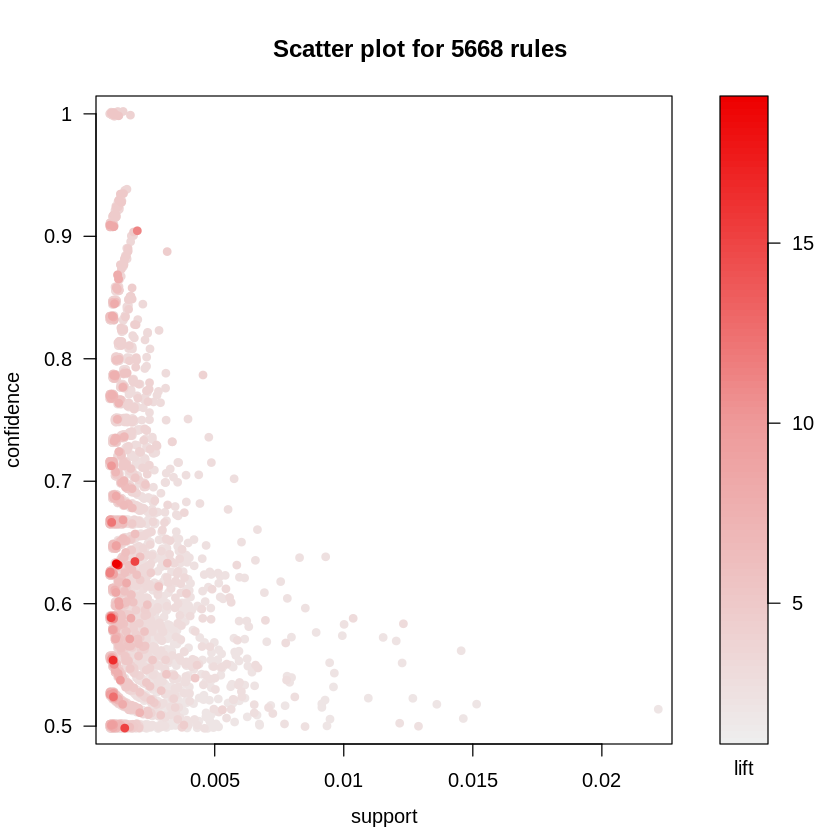

In [9]:
plot(rules)

In [10]:
head(quality(rules))

support,confidence,lift,count
0.0011,0.73,2.9,11
0.0012,0.52,2.8,12
0.0013,0.59,2.3,13
0.0013,0.57,2.2,13
0.0013,0.52,2.0,13
0.0037,0.64,2.5,36


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


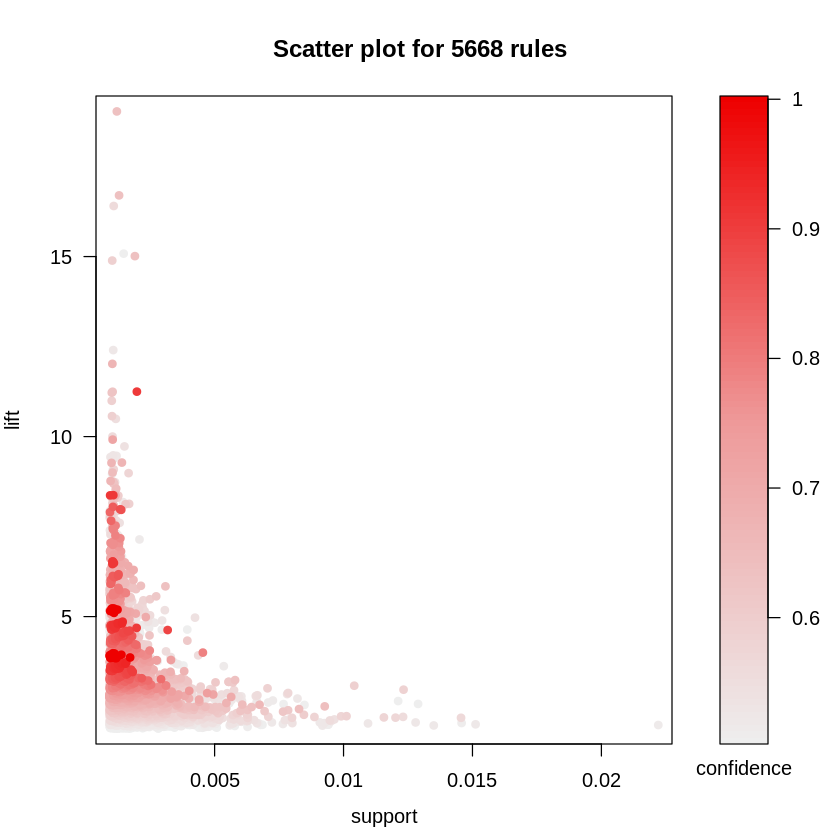

In [11]:
plot(rules, measure = c("support", "lift"), shading = "confidence")

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


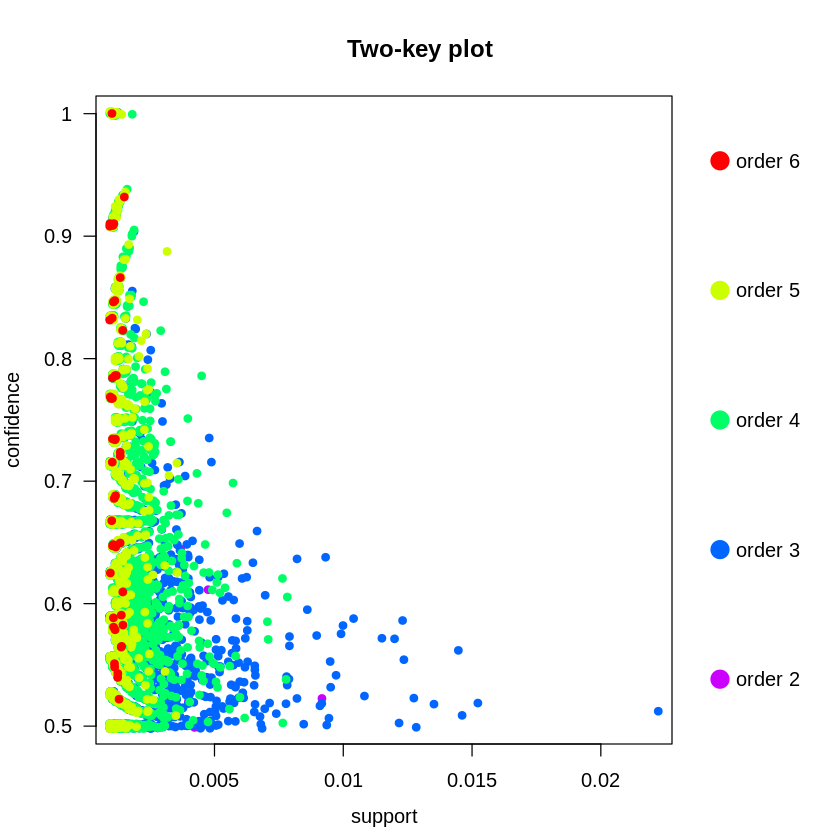

In [12]:
plot(rules, method = "two-key plot")

::GMG:: pp. 8 [...]

::GMG::Interactive mode for scatter plot (inspecting rules with high lift) does not work

## 4. Matrix-based visualizations

In [18]:
subrules <- rules[quality(rules)$confidence > 0.8]

In [19]:
subrules

set of 371 rules 

Itemsets in Antecedent (LHS)
  [1] "{liquor,red/blush wine}"                                                   
  [2] "{citrus fruit,other vegetables,soda,fruit/vegetable juice}"                
  [3] "{tropical fruit,other vegetables,whole milk,yogurt,oil}"                   
  [4] "{citrus fruit,grapes,fruit/vegetable juice}"                               
  [5] "{other vegetables,whole milk,yogurt,rice}"                                 
  [6] "{tropical fruit,other vegetables,whole milk,oil}"                          
  [7] "{ham,pip fruit,other vegetables,yogurt}"                                   
  [8] "{beef,citrus fruit,tropical fruit,other vegetables}"                       
  [9] "{tropical fruit,whole milk,butter,sliced cheese}"                          
 [10] "{other vegetables,curd,whipped/sour cream,cream cheese }"                  
 [11] "{tropical fruit,other vegetables,butter,white bread}"                      
 [12] "{sausage,pip fruit,sliced cheese}"                 

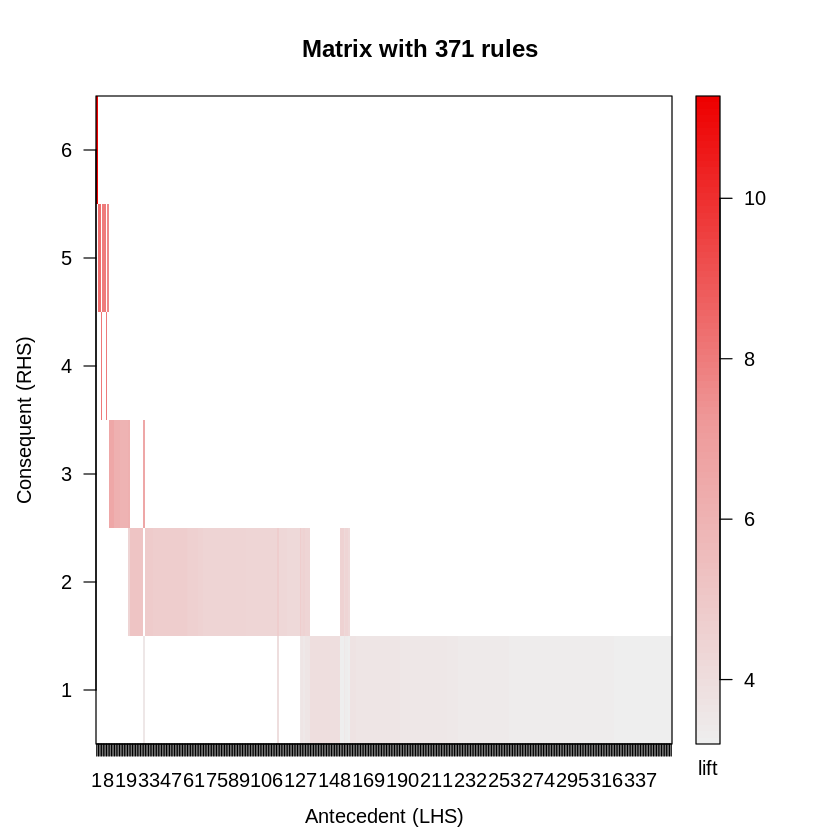

In [22]:
plot(subrules, method = "matrix", measure = "lift")

Itemsets in Antecedent (LHS)
  [1] "{liquor,red/blush wine}"                                                   
  [2] "{citrus fruit,other vegetables,soda,fruit/vegetable juice}"                
  [3] "{tropical fruit,other vegetables,whole milk,yogurt,oil}"                   
  [4] "{citrus fruit,grapes,fruit/vegetable juice}"                               
  [5] "{other vegetables,whole milk,yogurt,rice}"                                 
  [6] "{tropical fruit,other vegetables,whole milk,oil}"                          
  [7] "{ham,pip fruit,other vegetables,yogurt}"                                   
  [8] "{beef,citrus fruit,tropical fruit,other vegetables}"                       
  [9] "{tropical fruit,whole milk,butter,sliced cheese}"                          
 [10] "{other vegetables,curd,whipped/sour cream,cream cheese }"                  
 [11] "{tropical fruit,other vegetables,butter,white bread}"                      
 [12] "{sausage,pip fruit,sliced cheese}"                 

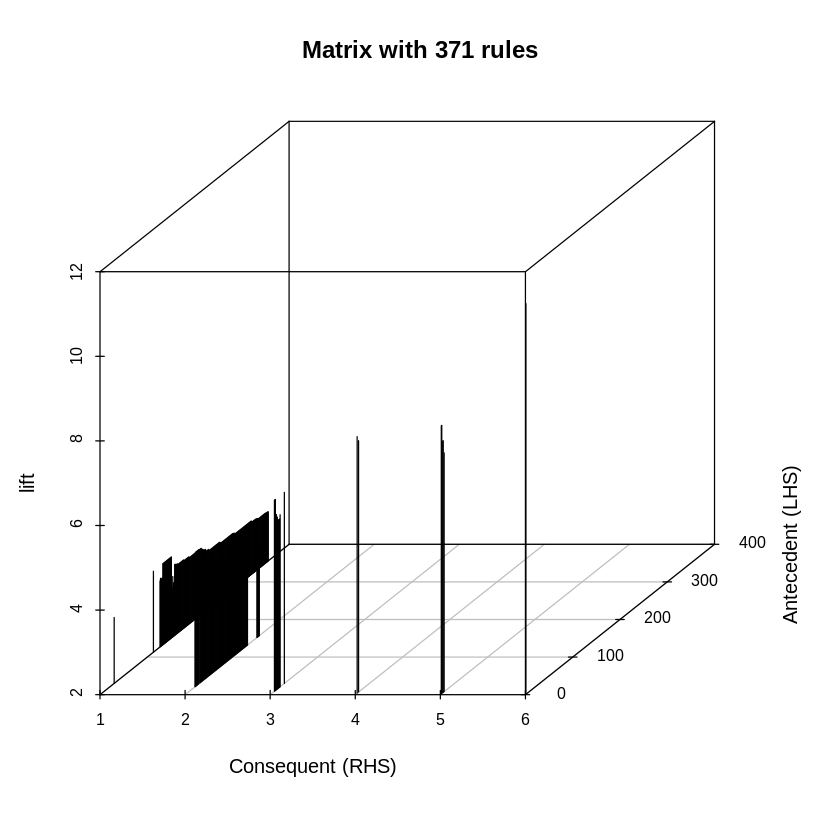

In [21]:
# https://stackoverflow.com/questions/46220841/arulesviz-interactive-plot-shiny-r
# https://stackoverflow.com/questions/32881345/plotting-interactive-arulesviz-plots-in-shiny-r?rq=1
plot(subrules, method = "matrix", engine="3d", measure = "lift")

## 5. Grouped matrix-based visualization

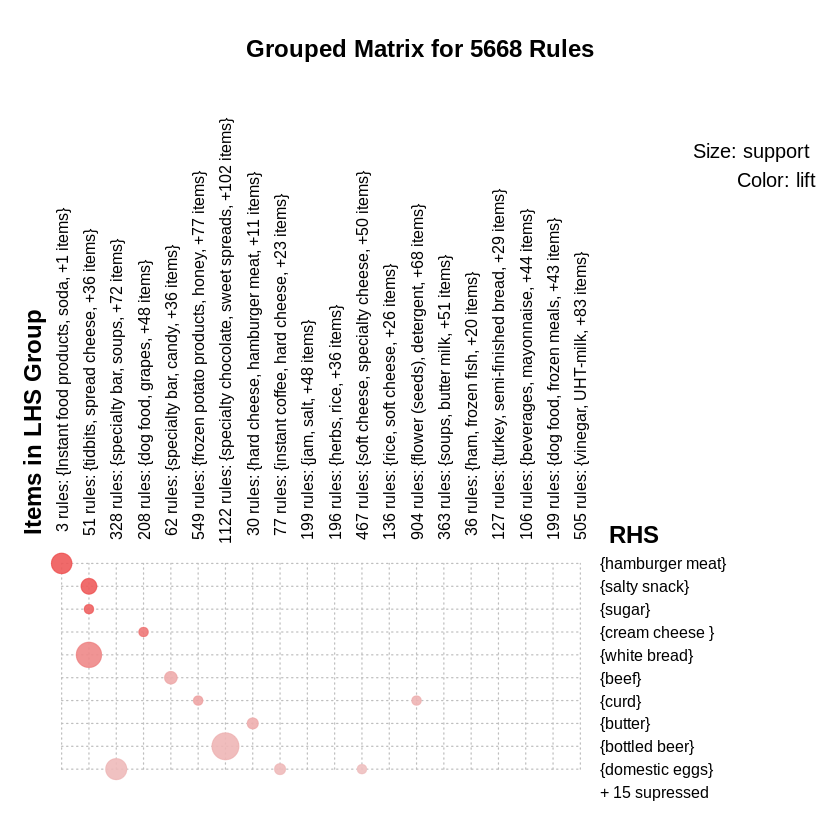

In [23]:
plot(rules, method = "grouped")

## 6. Graph-based visualizations

In [24]:
subrules2 <- head(rules, n = 10, by = "lift")

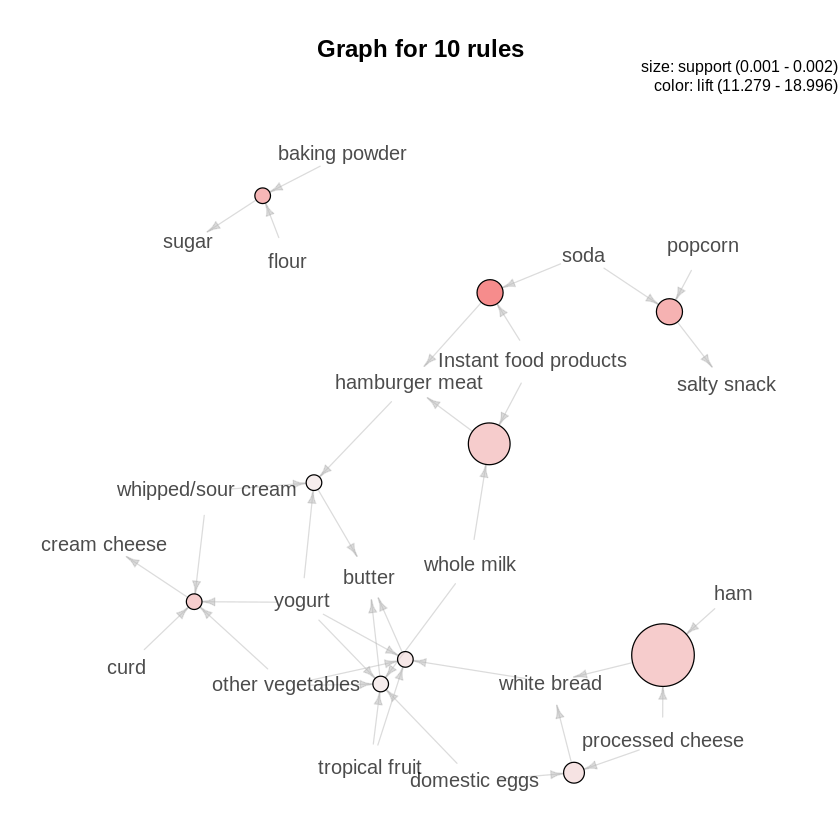

In [25]:
plot(subrules2, method = "graph")

## 7. Parallel coordinates plot

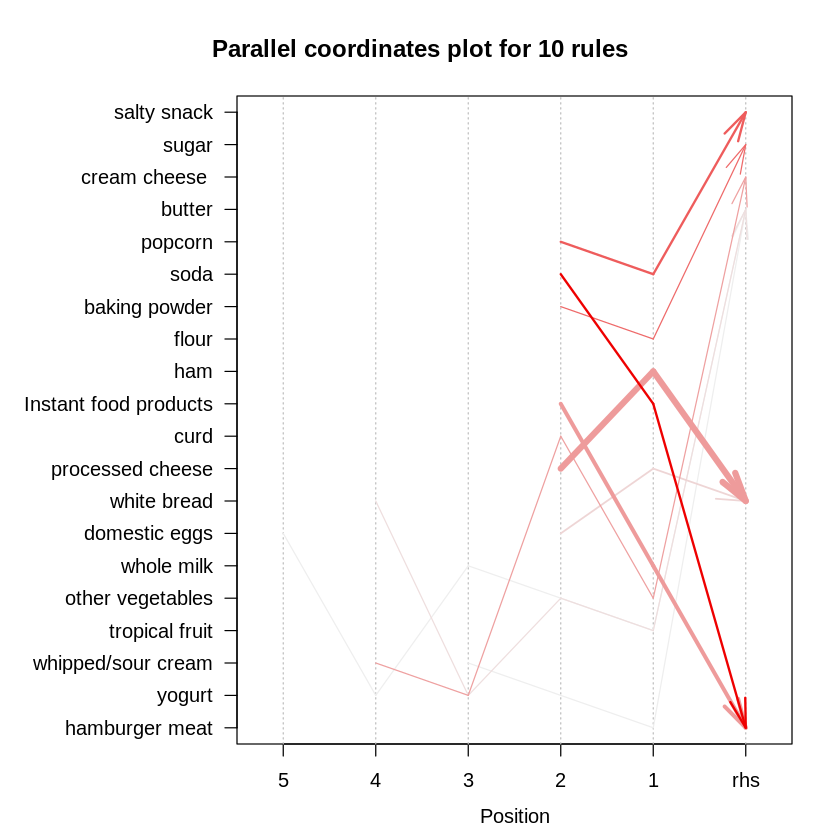

In [26]:
plot(subrules2, method = "paracoord")

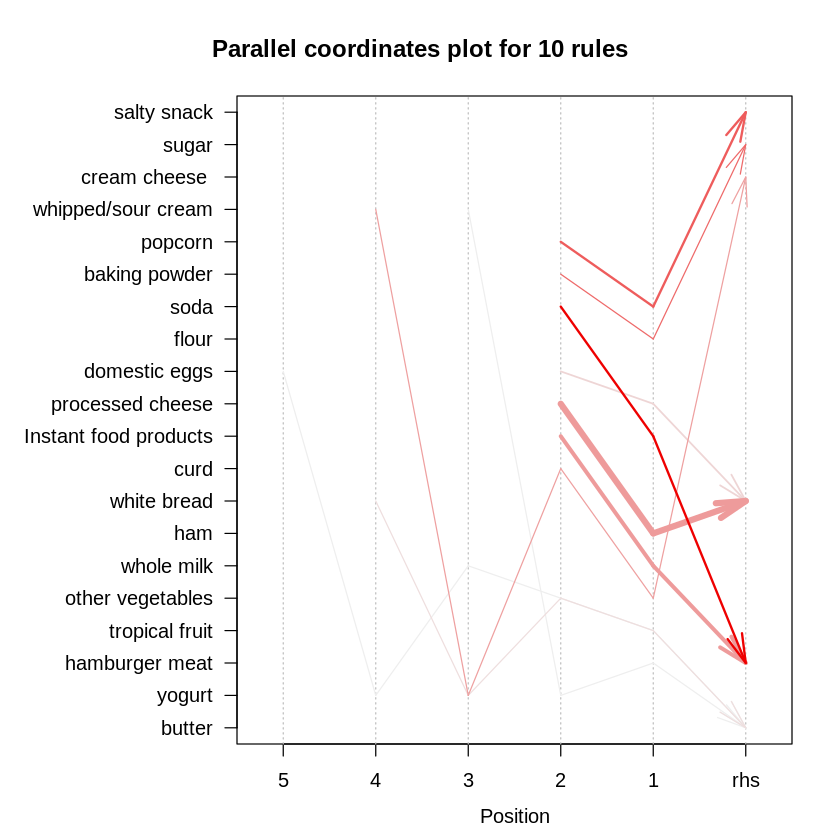

In [27]:
plot(subrules2, method = "paracoord", control = list(reorder = TRUE))